In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pré Proc

In [43]:
# 1. Chargement du fichier
df = pd.read_csv('../RAW_data/achats.csv')

# 2. Aperçu des premières lignes
print("Aperçu du fichier :")
display(df.head())

# 3. Infos générales (types, NaNs...)
print("\nInfos sur les colonnes :")
display(df.info())

# 4. Suppression des doublons
df = df.drop_duplicates()

# 5. Affichage des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

# 6. Suppression ou remplissage des valeurs manquantes
# Exemple : on remplit les colonnes numériques avec la moyenne
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Exemple : on remplit les colonnes catégorielles avec la valeur la plus fréquente
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 7. Vérification du nettoyage
print("\nAperçu après nettoyage :")
display(df.head())



Aperçu du fichier :


,id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours
0,PO000001;22/03/2024;P00627;22;S035;129.62;14
1,PO000002;12/06/2024;P00469;51;S018;110.81;8
2,PO000003;19/01/2024;P00849;16;S046;140.58;8
3,PO000004;20/11/2024;P00484;16;S030;120.77;9
4,PO000005;07/06/2024;P00196;22;S046;256.05;13



Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


None


Valeurs manquantes par colonne :


id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours    0
dtype: int64


Aperçu après nettoyage :


C:\Users\Jules\AppData\Local\Temp\ipykernel_19836\2550393011.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours
0,PO000001;22/03/2024;P00627;22;S035;129.62;14
1,PO000002;12/06/2024;P00469;51;S018;110.81;8
2,PO000003;19/01/2024;P00849;16;S046;140.58;8
3,PO000004;20/11/2024;P00484;16;S030;120.77;9
4,PO000005;07/06/2024;P00196;22;S046;256.05;13


In [44]:
# Vérifie s'il y a des doublons (lignes identiques)
duplicated_rows = df[df.duplicated()]

# Affiche le nombre de doublons
print(f"Nombre de lignes dupliquées : {duplicated_rows.shape[0]}")

# Affiche les lignes dupliquées si elles existent
if not duplicated_rows.empty:
    print("Voici les doublons :")
    display(duplicated_rows)
else:
    print("✅ Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
✅ Aucun doublon détecté.


In [45]:
# 1. Affiche les colonnes catégorielles (object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles :")
print(list(cat_cols))

# 2. Affiche les valeurs uniques pour chaque colonne catégorielle
print("\nValeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)

Colonnes catégorielles :
['id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours']

Valeurs uniques par colonne catégorielle :

--- id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours ---
id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours
PO009984;01/11/2024;P00834;83;S043;184.88;7     1
PO009983;26/07/2024;P00264;71;S024;226.54;13    1
PO009982;11/09/2024;P00742;57;S039;241.41;4     1
PO009981;17/02/2024;P00411;14;S006;47.94;7      1
PO009980;13/11/2024;P00040;83;S021;296.6;14     1
                                               ..
PO000005;07/06/2024;P00196;22;S046;256.05;13    1
PO000004;20/11/2024;P00484;16;S030;120.77;9     1
PO000003;19/01/2024;P00849;16;S046;140.58;8     1
PO000002;12/06/2024;P00469;51;S018;110.81;8     1
PO000001;22/03/2024;P00627;22;S035;129.62;14    1
Name: count, Length: 10000, dtype: int64
------------------------------


In [46]:
# Pour une belle mise en forme des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Colonnes catégorielles
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("🎯 Colonnes catégorielles :", list(cat_cols))

# 2. Affichage des valeurs uniques et graphiques barres
for col in cat_cols:
    print(f"\n🔸 {col} - Top catégories")
    print(df[col].value_counts().head(10))
    

🎯 Colonnes catégorielles : ['id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours']

🔸 id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours - Top catégories
id_achat;date_achat;id_produit;quantite;id_fournisseur;prix_unitaire;delai_livraison_jours
PO009984;01/11/2024;P00834;83;S043;184.88;7     1
PO009983;26/07/2024;P00264;71;S024;226.54;13    1
PO009982;11/09/2024;P00742;57;S039;241.41;4     1
PO009981;17/02/2024;P00411;14;S006;47.94;7      1
PO009980;13/11/2024;P00040;83;S021;296.6;14     1
PO009979;08/09/2024;P00467;38;S014;245.54;11    1
PO009978;31/03/2024;P00770;43;S013;243.39;7     1
PO009977;10/10/2024;P00273;84;S045;167.86;10    1
PO009976;13/09/2024;P00922;90;S042;74.4;14      1
PO009975;14/12/2024;P00873;59;S042;268.46;7     1
Name: count, dtype: int64


C:\Users\Jules\AppData\Local\Temp\ipykernel_19836\168532196.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
C:\Users\Jules\AppData\Local\Temp\ipykernel_19836\168532196.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
C:\Users\Jules\AppData\Local\Temp\ipykernel_19836\168532196.py:40: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_achats['date_achat'] = pd.to_datetime(df_achats['date_achat'])


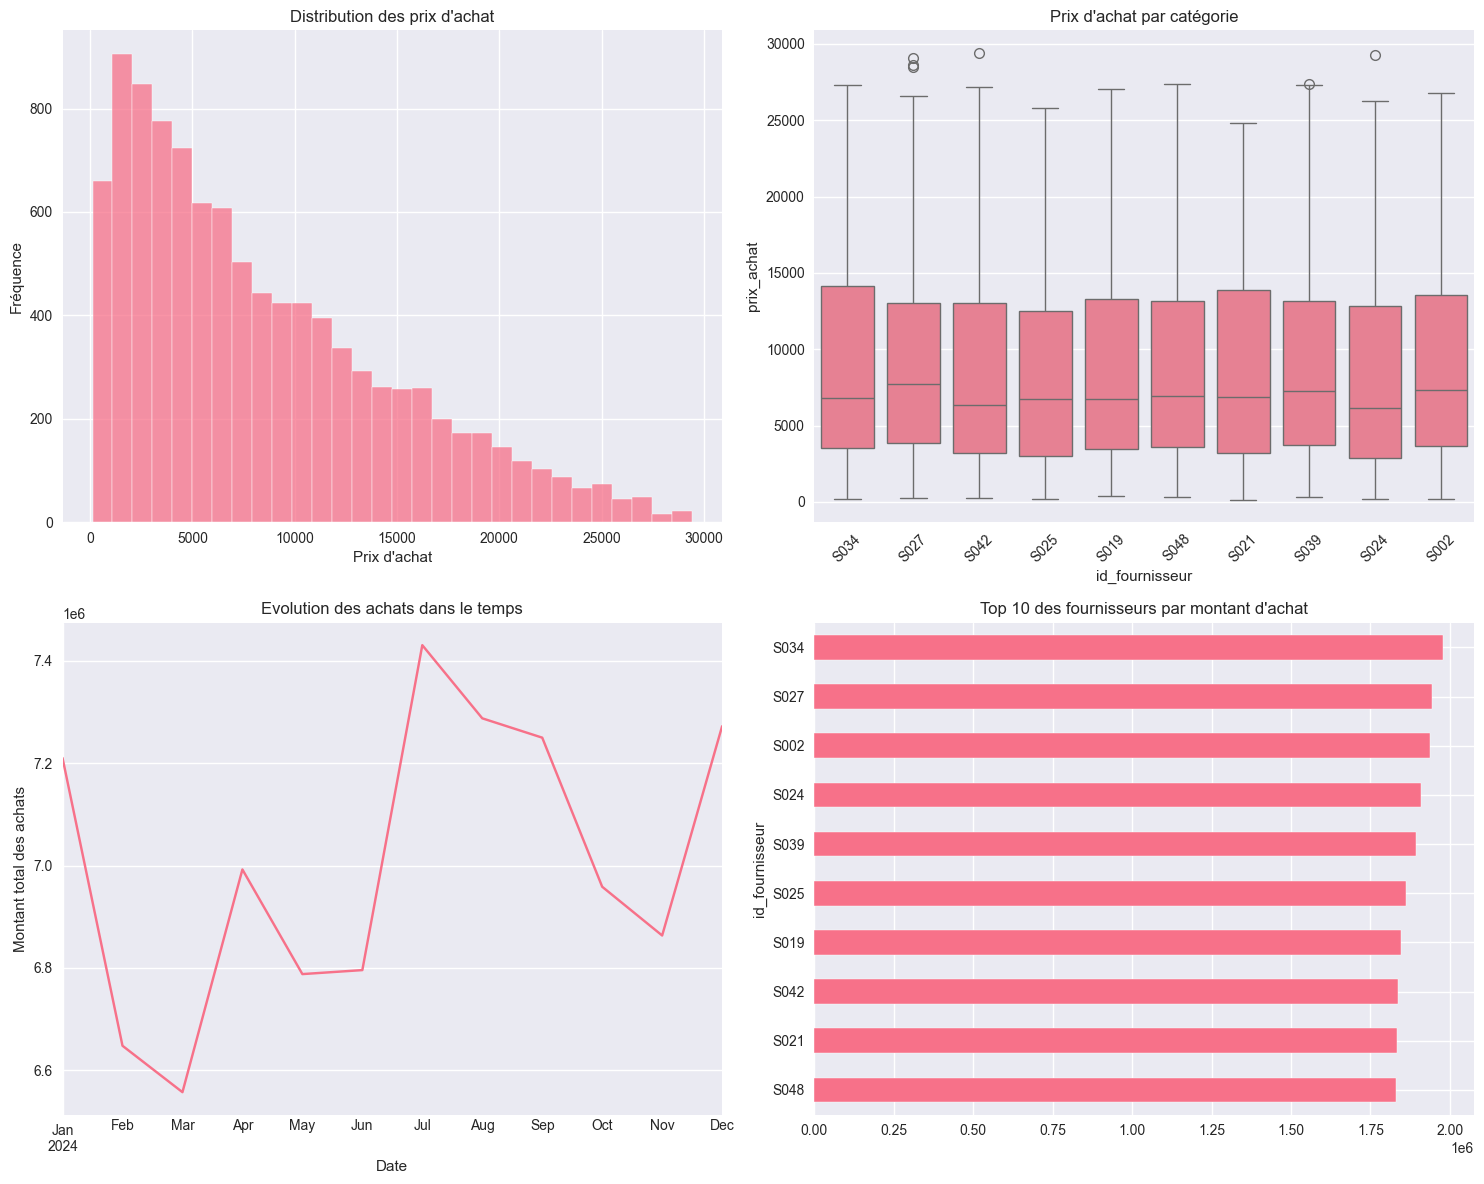

In [47]:
# Lecture du fichier des achats
df_achats = df  # Using the already loaded DataFrame from cell 2

# Configuration du style des graphiques
# Configuration du style des graphiques
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_palette("husl")# Lecture du fichier des achats et séparation des colonnes
df_achats = df[df.columns[0]].str.split(';', expand=True)
df_achats.columns = ['id_achat', 'date_achat', 'id_produit', 'quantite', 'id_fournisseur', 'prix_unitaire', 'delai_livraison_jours']

# Conversion des types de données
df_achats['prix_unitaire'] = df_achats['prix_unitaire'].astype(float)
df_achats['quantite'] = df_achats['quantite'].astype(int)
df_achats['prix_achat'] = df_achats['prix_unitaire'] * df_achats['quantite']

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_palette("husl")

# Création d'une figure avec 2x2 sous-graphiques
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des prix d'achat
sns.histplot(data=df_achats, x='prix_achat', bins=30, ax=ax1)
ax1.set_title('Distribution des prix d\'achat')
ax1.set_xlabel('Prix d\'achat')
ax1.set_ylabel('Fréquence')

# 2. Boîte à moustaches des prix par catégorie
# 2. Boîte à moustaches des prix par fournisseur (limité aux 10 premiers pour la lisibilité)
top_10_fournisseurs = df_achats.groupby('id_fournisseur')['prix_achat'].sum().nlargest(10).index
df_top10 = df_achats[df_achats['id_fournisseur'].isin(top_10_fournisseurs)]
sns.boxplot(data=df_top10, x='id_fournisseur', y='prix_achat', ax=ax2)
ax2.set_title('Prix d\'achat par fournisseur (Top 10)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Prix d\'achat par catégorie')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# 3. Evolution temporelle des achats
df_achats['date_achat'] = pd.to_datetime(df_achats['date_achat'])
achats_mensuel = df_achats.groupby(df_achats['date_achat'].dt.to_period('M'))['prix_achat'].sum()
achats_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Evolution des achats dans le temps')
ax3.set_xlabel('Date')
ax3.set_ylabel('Montant total des achats')

# 4. Top 10 des fournisseurs par montant d'achat
top_fournisseurs = df_achats.groupby('id_fournisseur')['prix_achat'].sum().sort_values(ascending=True).tail(10)
top_fournisseurs.plot(kind='barh', ax=ax4)
ax4.set_title('Top 10 des fournisseurs par montant d\'achat')

plt.tight_layout()
plt.show()